In [1]:
from pylab import rcParams
from xgboost import XGBClassifier
rcParams['figure.figsize'] = 10, 5
from plot_metric.functions import BinaryClassification
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report

/home/omar_totsso/.local/lib/python3.5/site-packages/xgboost/__init__.py:28: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [2]:
data= pd.read_csv('../data.csv')
data.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,...,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Loan Status
0,445412.0,709.0,1167493.0,5214.74,17.2,228190.0,416746.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,262328.0,729.0,1198700.5,33295.98,21.1,229976.0,850784.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,99999999.0,741.0,2231892.0,29200.53,14.9,297996.0,750090.0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
3,347666.0,721.0,806949.0,8741.90,12.0,256329.0,386958.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,176220.0,729.0,1198700.5,20639.70,6.1,253460.0,427174.0,1,0,0,...,0,1,0,0,0,0,0,0,1,1


In [3]:
data.dtypes

Current Loan Amount               float64
Credit Score                      float64
Annual Income                     float64
Monthly Debt                      float64
Years of Credit History           float64
Current Credit Balance            float64
Maximum Open Credit               float64
Term_Short Term                     int64
Years in current job_10+ years      int64
Years in current job_2 years        int64
Years in current job_3 years        int64
Years in current job_4 years        int64
Years in current job_5 years        int64
Years in current job_6 years        int64
Years in current job_7 years        int64
Years in current job_8 years        int64
Years in current job_9 years        int64
Years in current job_< 1 year       int64
Home Ownership_Own Home             int64
Home Ownership_Rent                 int64
Loan Status                         int64
dtype: object

In [4]:
##copying data
data1=data.copy()

### spliting data en X et Y

In [5]:
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

### spliting the data to train and test

In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### XGBoost

In [7]:
## converting Y_train & X_test & Y_train & Y_test to numpy array pour XGBoost
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [8]:
xgb= XGBClassifier()
params= {
        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13,14],
        'n_estimators' : [100, 300, 500, 800]
        }

##accuracy
grid_search_acc= GridSearchCV(estimator=xgb, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

----------
best parameters:  {'max_depth': 6, 'n_estimators': 500}
----------
[[15209  4151]
 [ 1857 17469]]
----------
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     19360
           1       0.81      0.90      0.85     19326

    accuracy                           0.84     38686
   macro avg       0.85      0.84      0.84     38686
weighted avg       0.85      0.84      0.84     38686

----------


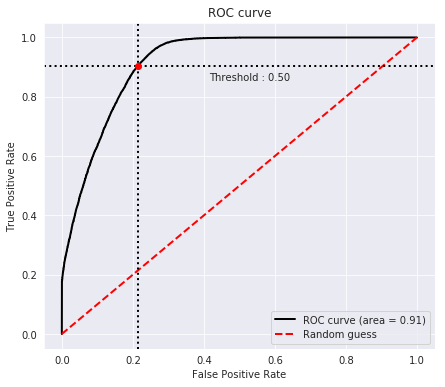

In [9]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('ROC curve')
plt.show()

In [10]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=xgb, param_grid= params, scoring=rec_avg,cv=2, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [11]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'max_depth': 6, 'n_estimators': 500}
----------
[[15209  4151]
 [ 1857 17469]]
----------
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     19360
           1       0.81      0.90      0.85     19326

    accuracy                           0.84     38686
   macro avg       0.85      0.84      0.84     38686
weighted avg       0.85      0.84      0.84     38686

----------


In [12]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=xgb, param_grid= params, scoring=prec_avg,cv=2, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [13]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'max_depth': 6, 'n_estimators': 500}
----------
[[15209  4151]
 [ 1857 17469]]
----------
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     19360
           1       0.81      0.90      0.85     19326

    accuracy                           0.84     38686
   macro avg       0.85      0.84      0.84     38686
weighted avg       0.85      0.84      0.84     38686

----------


In [14]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2))
    scores_mean= scores_mean.T
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.845,0.867])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
        #ax.plot(19, scores_mean[idx, -1:], '*', label= 'crt' + '=' + str(val) + ' & mx_dpt=None')
        
    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

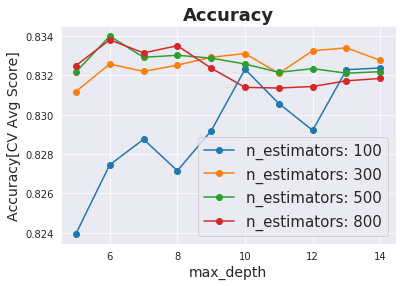

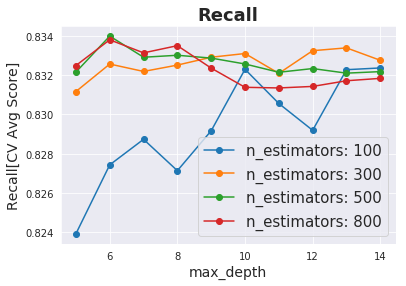

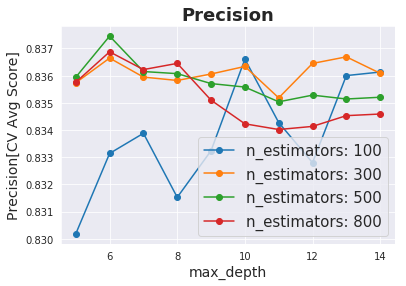

In [15]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['max_depth'], params['n_estimators'],  'max_depth', 'n_estimators', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['max_depth'], params['n_estimators'],  'max_depth', 'n_estimators', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['max_depth'], params['n_estimators'], 'max_depth', 'n_estimators', 'Precision')


In [16]:
##return index for dataframe
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list
index= return_index_list(params['max_depth'], params['n_estimators'])

In [17]:
df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                     'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)
        
## to excel
writer = pd.ExcelWriter('XGBoost.xlsx')
df.to_excel(writer, 'XGboost')
writer.save()
writer.close()

In [18]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[5, 100]",0.823954,0.830181,0.823928,0.001629
"[5, 300]",0.831177,0.835739,0.831155,0.002448
"[5, 500]",0.832163,0.835944,0.832143,0.002969
"[5, 800]",0.832495,0.835758,0.832477,0.001728
"[6, 100]",0.827454,0.833138,0.827430,0.000986
"[6, 300]",0.832573,0.836647,0.832552,0.002338
"[6, 500]",0.833991,0.837456,0.833972,0.000720
"[6, 800]",0.833802,0.836878,0.833784,0.000798
"[7, 100]",0.828751,0.833878,0.828727,0.001152
"[7, 300]",0.832196,0.835948,0.832176,0.002072


In [19]:
grid_search_acc.cv_results_



{'mean_fit_time': array([ 65.04177403, 183.99625242, 308.92419255, 466.15847802,
         75.126647  , 226.58615887, 361.44281304, 547.9902401 ,
         88.09168172, 248.66812468, 388.89439261, 592.73098171,
         94.77053905, 271.24403179, 409.58106434, 557.37066734,
        109.45254564, 259.76752698, 392.0727638 , 486.75037563,
         95.14726484, 249.63492393, 321.37886536, 427.94688141,
         78.83437884, 185.43635619, 280.73268044, 453.88619983,
         63.01162148, 176.24734902, 303.78422463, 598.8268528 ,
         64.94048238, 202.93370044, 401.66915011, 739.27305305,
         70.66682315, 307.82479703, 568.18053305, 861.5531801 ]),
 'mean_score_time': array([ 1.47693479,  4.10541666,  6.33117259,  9.86342287,  1.61071086,
         5.46506703,  7.77710068, 13.52484691,  2.18742192,  5.23037994,
         9.74694562, 12.35061669,  2.2223531 ,  5.87222052,  9.13388944,
        13.45966303,  2.6528939 ,  6.06393528,  8.51267755, 16.65149605,
         2.45472097,  5.389754